In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from anytree import Node, RenderTree

In [2]:
data_path = 'data/opencv-findcontours_01.png'
img = cv2.imread(data_path, 0)

In [3]:
img.shape

(362, 420)

In [4]:
# 輪郭を抽出する。
contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

memo = '''
contours, hierarchy = cv2.findContours(image, mode, method[, contours[, hierarchy[, offset]]])
- 引数
    - image: 入力画像 (8bit、1チャンネル)。非0の画素は1とした2値画像として扱われる。
    - mode: 輪郭を検索する方法を指定する。
    - method: 輪郭を近似する方法を指定する。
    - contours: 輪郭。(引数で結果を受け取る場合、指定する。)
    - hierarchy: 階層構造。(引数で結果を受け取る場合、指定する。)
    - offset: 返り値の輪郭の点にオフセットを加えたい場合は指定する。
- 返り値
    - contours: 抽出された輪郭のリスト。各輪郭は (NumPoints, 1, 2) の numpy 配列。
    - hierarchy: (1, NumContours, 4) の numpy 配列。階層構造のリスト。
    
    
mode 引数では、輪郭を検索する方法を指定する。
    cv2.RETR_EXTERNAL: 一番外側の輪郭のみ抽出する。
    cv2.RETR_LIST: すべての輪郭を抽出するが、階層構造は作成しない。
    cv2.RETR_CCOMP: すべての輪郭を抽出し、2階層の階層構造を作成する。
    cv2.RETR_TREE: すべての輪郭を抽出し、ツリーで階層構造を作成する。
    cv2.RETR_LIST、cv2.RETR_CCOMP、cv2.RETR_TREE はいずれもすべての輪郭を抽出するが、返り値の hierarchy の内容が異なる。
    
    
階層構造(hierarchy)について
    抽出された輪郭 contours が N個であった場合、hierarchy は (1, N, 4) の numpy 配列で、
    輪郭 contours[i] の階層情報は hierarchy[0, i] に格納されている。
    4つの要素は、[次のインデックス、前のインデックス、最初の子のインデックス、親のインデックス] である。
    次、前、子、親が存在しない場合は -1 が入っている。
'''

In [5]:
len(contours), contours[0].shape

(5, (4, 1, 2))

In [6]:
cnt = contours[0]
cnt

array([[[ 25, 251]],

       [[ 25, 321]],

       [[ 95, 321]],

       [[ 95, 251]]], dtype=int32)

In [7]:
cnt = cnt.squeeze(axis=1)
cnt.shape

(4, 2)

In [8]:
hierarchy[0,0]

array([ 1, -1, -1, -1], dtype=int32)

## Mode について

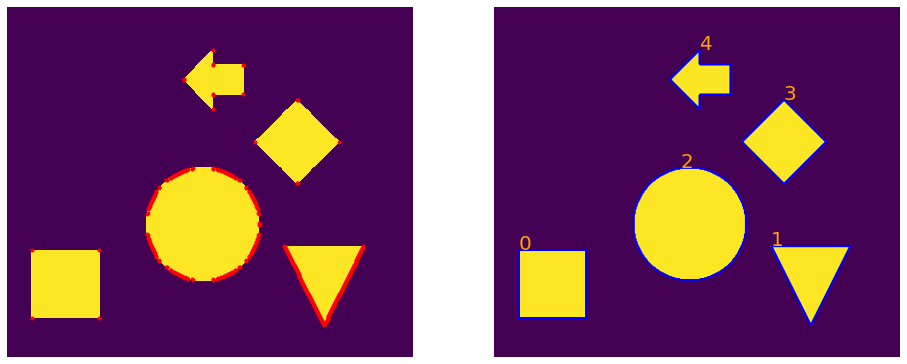

<Figure size 432x288 with 0 Axes>

In [9]:
def draw_contours(axs, img, contours):
    axs[0].imshow(img)  # 画像を表示する。
    axs[0].set_axis_off()
    
    axs[1].imshow(img)
    axs[1].set_axis_off()

    for i, cnt in enumerate(contours):
        # 形状を変更する。(NumPoints, 1, 2) -> (NumPoints, 2)
        cnt = cnt.squeeze(axis=1)
        # 輪郭の点を描画する。
        axs[0].plot(cnt[:, 0], cnt[:, 1], "ro", mew=0, ms=4)
        # 輪郭の点同士を結ぶ線を描画する。
        axs[1].add_patch(Polygon(cnt, color="b", fill=None, lw=2))
        # 輪郭の番号を描画する。
        axs[1].text(cnt[0][0], cnt[0][1], i, color="orange", size="20")
        
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
draw_contours(axs, img, contours)

plt.show()
plt.clf()

In [10]:
data_path = 'data/opencv-findcontours_04.png'
img = cv2.imread(data_path, 0)

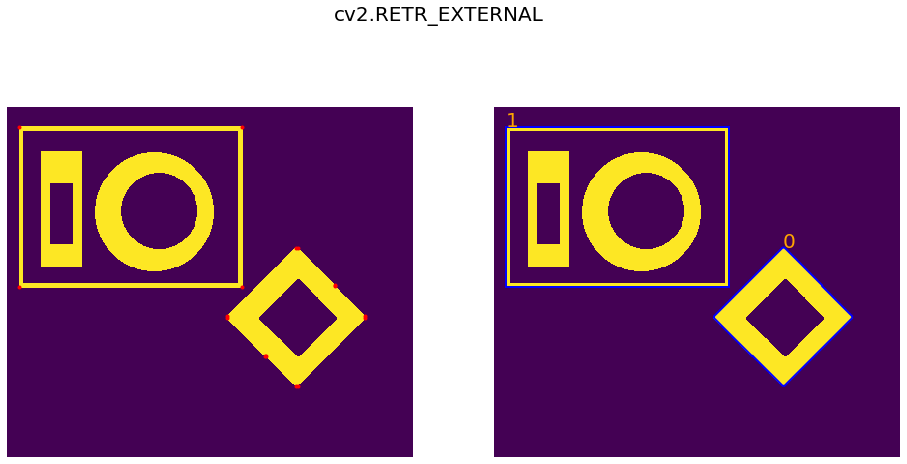

<Figure size 432x288 with 0 Axes>

In [11]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 抽出した輪郭を描画する。
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("cv2.RETR_EXTERNAL", fontsize=20)
draw_contours(axs, img, contours)

plt.show()
plt.clf()

In [13]:
hierarchy

array([[[ 1, -1, -1, -1],
        [-1,  0, -1, -1]]], dtype=int32)

In [12]:
num_contours = len(hierarchy[0])

# any tree で階層構造を元に木を作成する。

# 頂点を作成する。
root = Node("root")
nodes = {i: Node(f"contour {i}") for i in range(num_contours)}
nodes[-1] = root

# 辺を作成する。
for i, (next_sibling, prev_sibling, first_child, parent) in enumerate(hierarchy[0]):
    nodes[i].parent = nodes[parent]
    print(
        f"contour {i} (next_sibling: {next_sibling}, prev_sibling: {prev_sibling},"
        f" first_child: {first_child}, parent: {parent})"
    )

# 木を出力する。
for pre, fill, node in RenderTree(root):
    print("{}{}".format(pre, node.name))

contour 0 (next_sibling: 1, prev_sibling: -1, first_child: -1, parent: -1)
contour 1 (next_sibling: -1, prev_sibling: 0, first_child: -1, parent: -1)
root
├── contour 0
└── contour 1


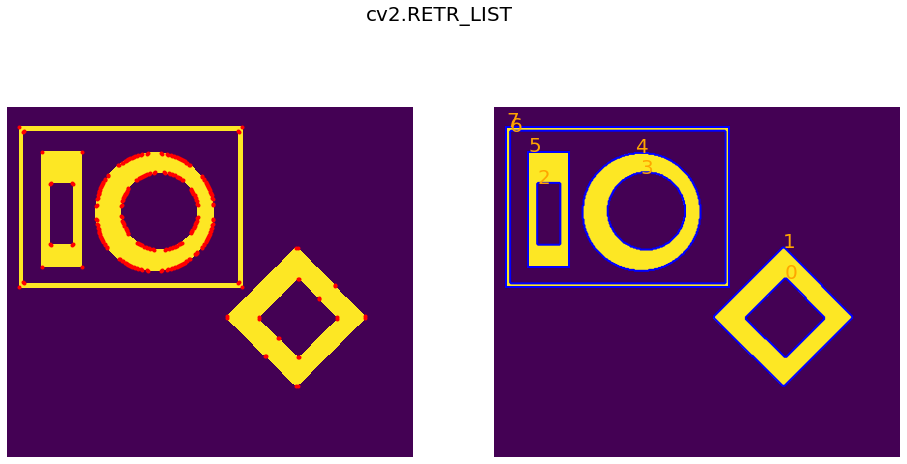

<Figure size 432x288 with 0 Axes>

In [15]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# 抽出した輪郭を描画する。
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("cv2.RETR_LIST", fontsize=20)
draw_contours(axs, img, contours)

plt.show()
plt.clf()

In [17]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [-1,  6, -1, -1]]], dtype=int32)

In [18]:
num_contours = len(hierarchy[0])

# any tree で階層構造を元に木を作成する。

# 頂点を作成する。
root = Node("root")
nodes = {i: Node(f"contour {i}") for i in range(num_contours)}
nodes[-1] = root

# 辺を作成する。
for i, (next_sibling, prev_sibling, first_child, parent) in enumerate(hierarchy[0]):
    nodes[i].parent = nodes[parent]
    print(
        f"contour {i} (next_sibling: {next_sibling}, prev_sibling: {prev_sibling},"
        f" first_child: {first_child}, parent: {parent})"
    )

# 木を出力する。
for pre, fill, node in RenderTree(root):
    print("{}{}".format(pre, node.name))

contour 0 (next_sibling: 1, prev_sibling: -1, first_child: -1, parent: -1)
contour 1 (next_sibling: 2, prev_sibling: 0, first_child: -1, parent: -1)
contour 2 (next_sibling: 3, prev_sibling: 1, first_child: -1, parent: -1)
contour 3 (next_sibling: 4, prev_sibling: 2, first_child: -1, parent: -1)
contour 4 (next_sibling: 5, prev_sibling: 3, first_child: -1, parent: -1)
contour 5 (next_sibling: 6, prev_sibling: 4, first_child: -1, parent: -1)
contour 6 (next_sibling: 7, prev_sibling: 5, first_child: -1, parent: -1)
contour 7 (next_sibling: -1, prev_sibling: 6, first_child: -1, parent: -1)
root
├── contour 0
├── contour 1
├── contour 2
├── contour 3
├── contour 4
├── contour 5
├── contour 6
└── contour 7


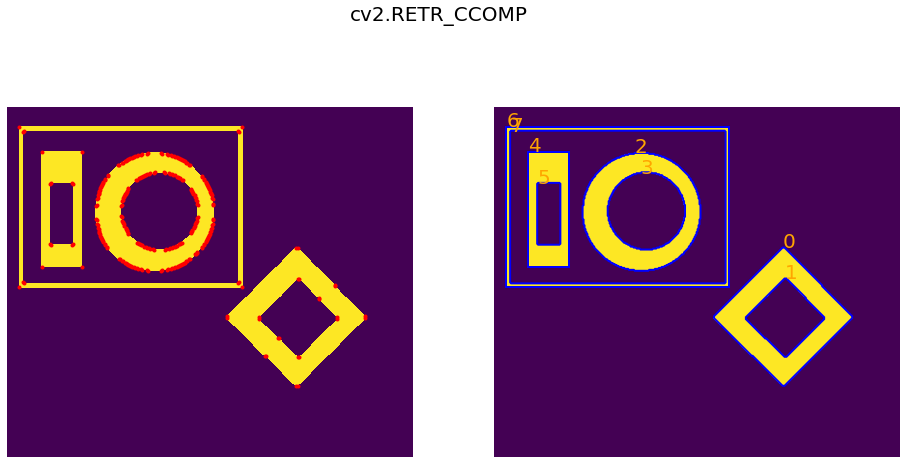

<Figure size 432x288 with 0 Axes>

In [19]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# 抽出した輪郭を描画する。
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("cv2.RETR_CCOMP", fontsize=20)
draw_contours(axs, img, contours)

plt.show()
plt.clf()

In [20]:
hierarchy

array([[[ 2, -1,  1, -1],
        [-1, -1, -1,  0],
        [ 4,  0,  3, -1],
        [-1, -1, -1,  2],
        [ 6,  2,  5, -1],
        [-1, -1, -1,  4],
        [-1,  4,  7, -1],
        [-1, -1, -1,  6]]], dtype=int32)

In [21]:
num_contours = len(hierarchy[0])

# any tree で階層構造を元に木を作成する。

# 頂点を作成する。
root = Node("root")
nodes = {i: Node(f"contour {i}") for i in range(num_contours)}
nodes[-1] = root

# 辺を作成する。
for i, (next_sibling, prev_sibling, first_child, parent) in enumerate(hierarchy[0]):
    nodes[i].parent = nodes[parent]
    print(
        f"contour {i} (next_sibling: {next_sibling}, prev_sibling: {prev_sibling},"
        f" first_child: {first_child}, parent: {parent})"
    )

# 木を出力する。
for pre, fill, node in RenderTree(root):
    print("{}{}".format(pre, node.name))

contour 0 (next_sibling: 2, prev_sibling: -1, first_child: 1, parent: -1)
contour 1 (next_sibling: -1, prev_sibling: -1, first_child: -1, parent: 0)
contour 2 (next_sibling: 4, prev_sibling: 0, first_child: 3, parent: -1)
contour 3 (next_sibling: -1, prev_sibling: -1, first_child: -1, parent: 2)
contour 4 (next_sibling: 6, prev_sibling: 2, first_child: 5, parent: -1)
contour 5 (next_sibling: -1, prev_sibling: -1, first_child: -1, parent: 4)
contour 6 (next_sibling: -1, prev_sibling: 4, first_child: 7, parent: -1)
contour 7 (next_sibling: -1, prev_sibling: -1, first_child: -1, parent: 6)
root
├── contour 0
│   └── contour 1
├── contour 2
│   └── contour 3
├── contour 4
│   └── contour 5
└── contour 6
    └── contour 7


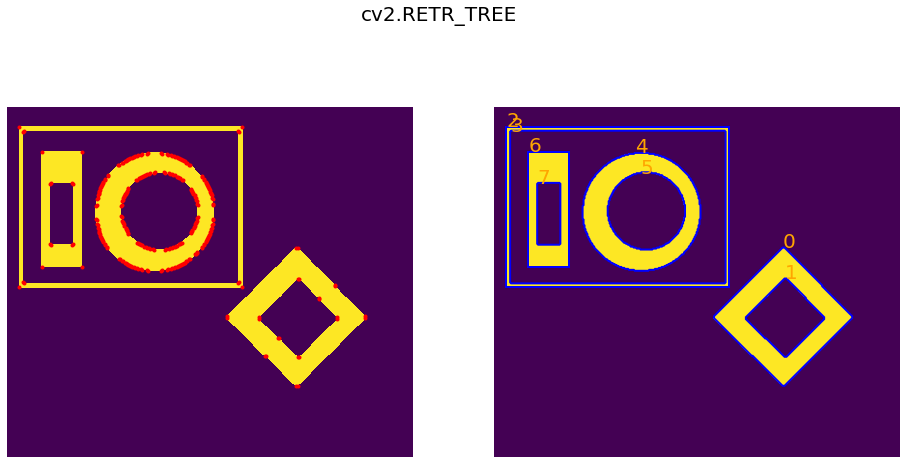

<Figure size 432x288 with 0 Axes>

In [22]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 抽出した輪郭を描画する。
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("cv2.RETR_TREE", fontsize=20)
draw_contours(axs, img, contours)

plt.show()
plt.clf()

In [23]:
hierarchy

array([[[ 2, -1,  1, -1],
        [-1, -1, -1,  0],
        [-1,  0,  3, -1],
        [-1, -1,  4,  2],
        [ 6, -1,  5,  3],
        [-1, -1, -1,  4],
        [-1,  4,  7,  3],
        [-1, -1, -1,  6]]], dtype=int32)

In [24]:
num_contours = len(hierarchy[0])

# any tree で階層構造を元に木を作成する。

# 頂点を作成する。
root = Node("root")
nodes = {i: Node(f"contour {i}") for i in range(num_contours)}
nodes[-1] = root

# 辺を作成する。
for i, (next_sibling, prev_sibling, first_child, parent) in enumerate(hierarchy[0]):
    nodes[i].parent = nodes[parent]
    print(
        f"contour {i} (next_sibling: {next_sibling}, prev_sibling: {prev_sibling},"
        f" first_child: {first_child}, parent: {parent})"
    )

# 木を出力する。
for pre, fill, node in RenderTree(root):
    print("{}{}".format(pre, node.name))

contour 0 (next_sibling: 2, prev_sibling: -1, first_child: 1, parent: -1)
contour 1 (next_sibling: -1, prev_sibling: -1, first_child: -1, parent: 0)
contour 2 (next_sibling: -1, prev_sibling: 0, first_child: 3, parent: -1)
contour 3 (next_sibling: -1, prev_sibling: -1, first_child: 4, parent: 2)
contour 4 (next_sibling: 6, prev_sibling: -1, first_child: 5, parent: 3)
contour 5 (next_sibling: -1, prev_sibling: -1, first_child: -1, parent: 4)
contour 6 (next_sibling: -1, prev_sibling: 4, first_child: 7, parent: 3)
contour 7 (next_sibling: -1, prev_sibling: -1, first_child: -1, parent: 6)
root
├── contour 0
│   └── contour 1
└── contour 2
    └── contour 3
        ├── contour 4
        │   └── contour 5
        └── contour 6
            └── contour 7


## Method 輪郭近似手法について

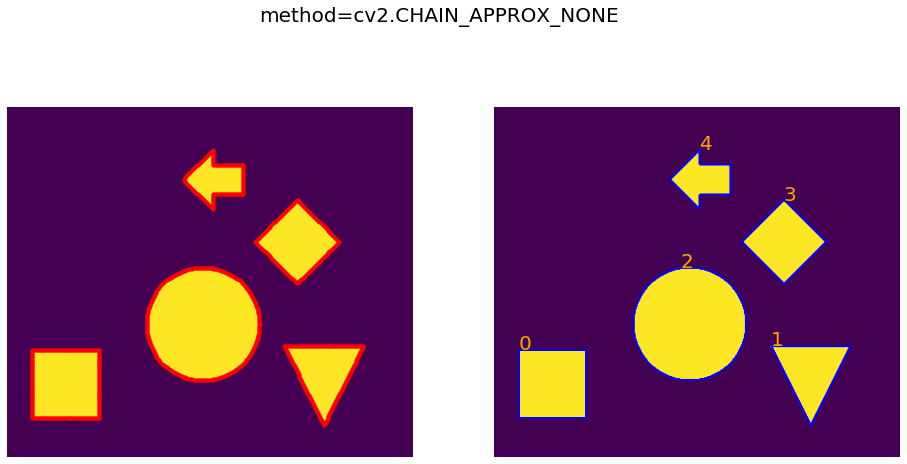

<Figure size 432x288 with 0 Axes>

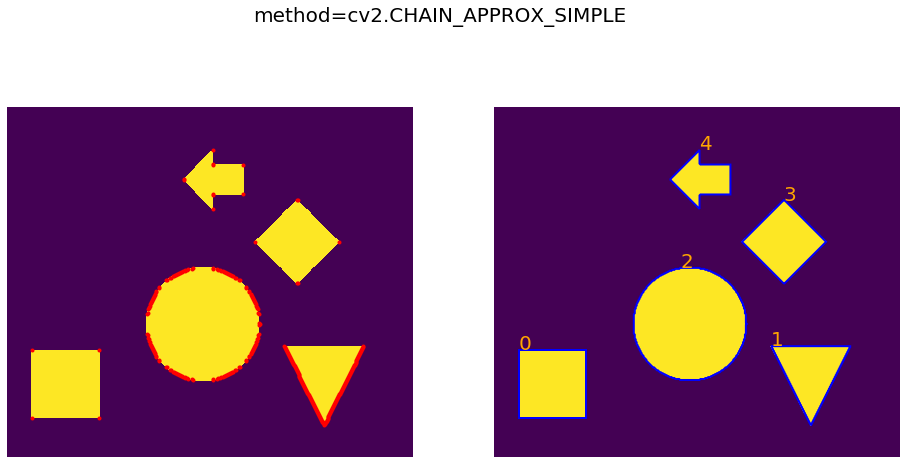

<Figure size 432x288 with 0 Axes>

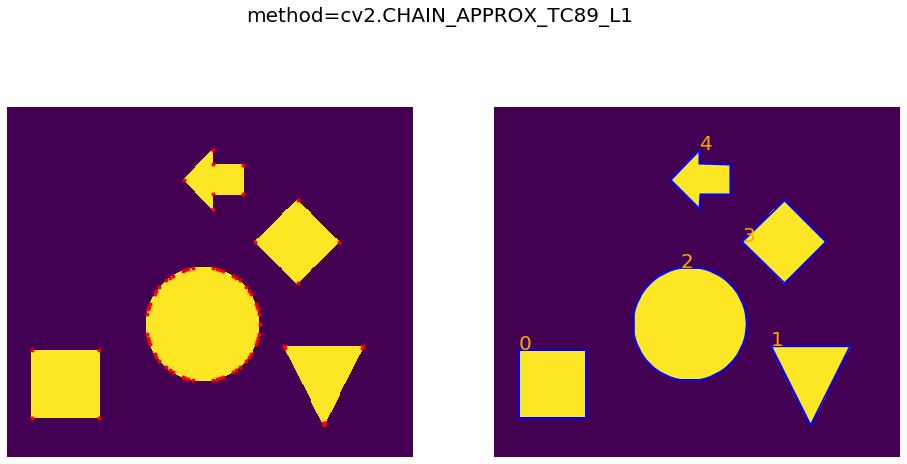

<Figure size 432x288 with 0 Axes>

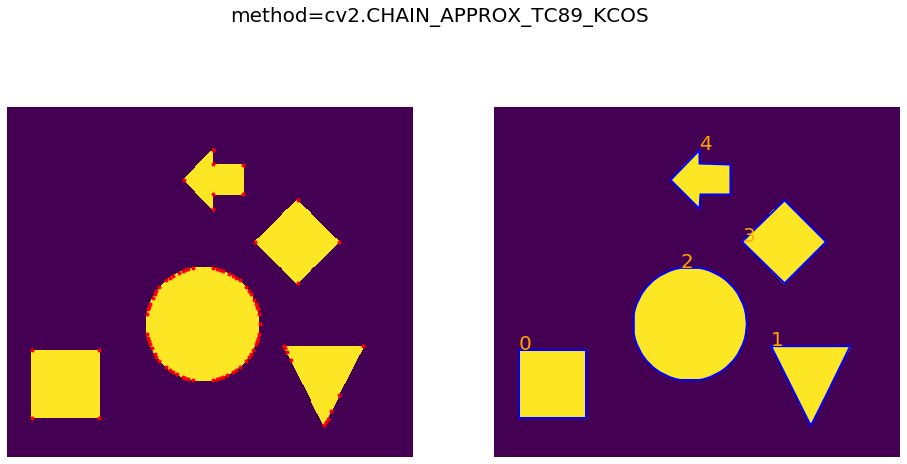

<Figure size 432x288 with 0 Axes>

In [30]:
data_path = 'data/opencv-findcontours_01.png'
img = cv2.imread(data_path, 0)

# 各 method での輪郭抽出の結果を描画する。
params = {
    "cv2.CHAIN_APPROX_NONE": cv2.CHAIN_APPROX_NONE,
    "cv2.CHAIN_APPROX_SIMPLE": cv2.CHAIN_APPROX_SIMPLE,
    "cv2.CHAIN_APPROX_TC89_L1": cv2.CHAIN_APPROX_TC89_L1,
    "cv2.CHAIN_APPROX_TC89_KCOS": cv2.CHAIN_APPROX_TC89_KCOS,
}

for i, (name, param) in enumerate(params.items(), 1):
    fig, axs = plt.subplots(1,2,figsize=(16, 8))

    # 輪郭を抽出する。
    contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, param)

    # 抽出した輪郭を描画する。
    fig.suptitle(f"method={name}", fontsize=20)
    draw_contours(axs, img, contours)

    plt.show()
    plt.clf()

## その他

In [32]:
data_path = 'data/opencv-findcontours_01.png'
img = cv2.imread(data_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

contours, hierarchy = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
c = contours[0]

# 輪郭内の面積
print("area of contour 0 :", cv2.contourArea(c))

# 輪郭の長さ
print("length of contour 0 :", cv2.arcLength(c, True))

area of contour 0 : 4900.0
length of contour 0 : 280.0


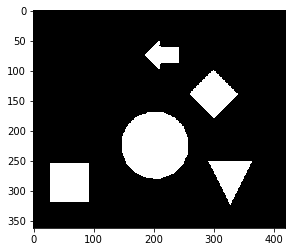

<Figure size 432x288 with 0 Axes>

In [35]:
# 輪郭検出後の近似
for c in contours:
#     if cv2.contourArea(c) < 90:
#         continue

    epsilon = 0.01 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, epsilon, True)
    img = cv2.drawContours(img, c, -1, (0, 0, 255), 3)
    img = cv2.drawContours(img, [approx], -1, (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.clf()